<a href="https://colab.research.google.com/github/sudhrathore/sudhanshu_AIMLBootcamp_Genzeon_2023/blob/main/MallCustomers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

MessageError: ignored

In [2]:
dataset='/content/drive/MyDrive/Mall_Customers.csv'
import pandas as pd
df=pd.read_csv(dataset)
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
df.columns


Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

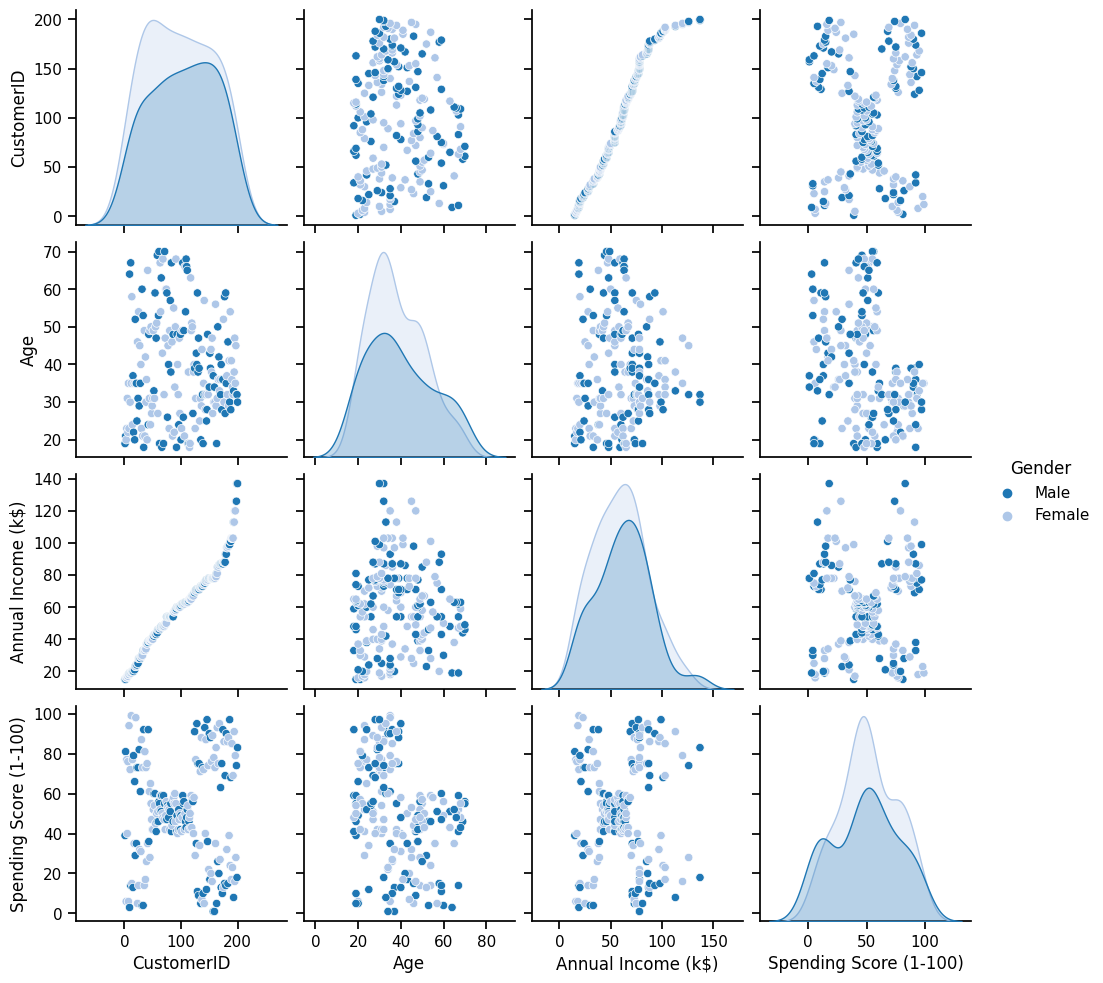

In [4]:
from seaborn.rcmod import palettes
import seaborn as sns
with sns.plotting_context("notebook"):
  sns.pairplot(df[['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)']],hue='Gender',palette='tab20')

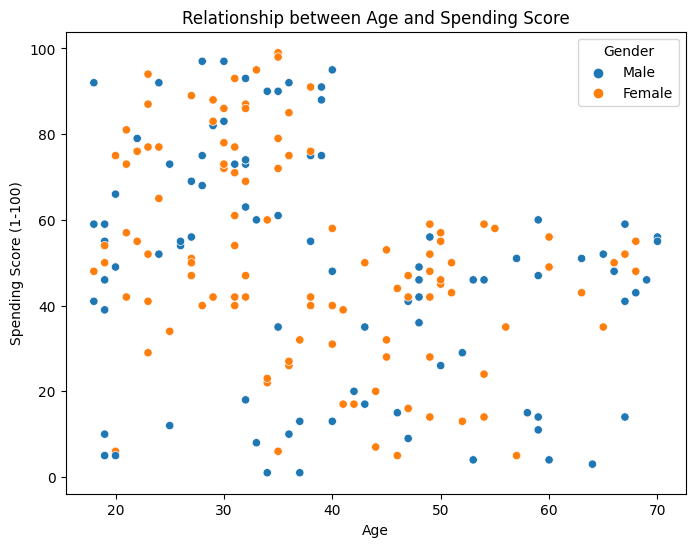

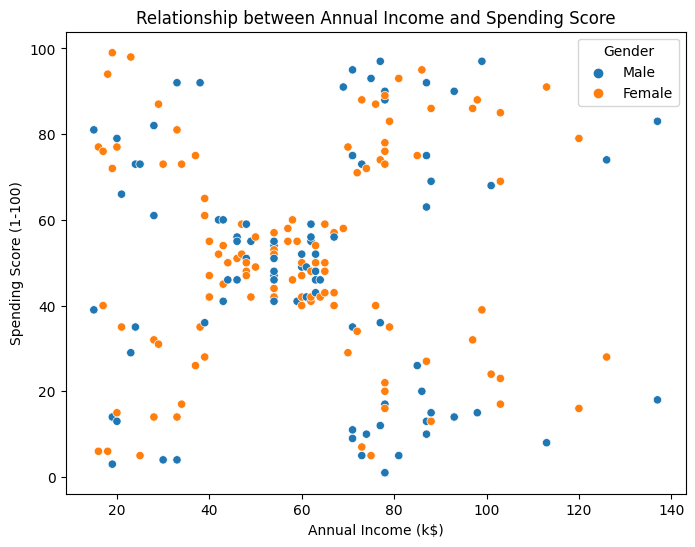

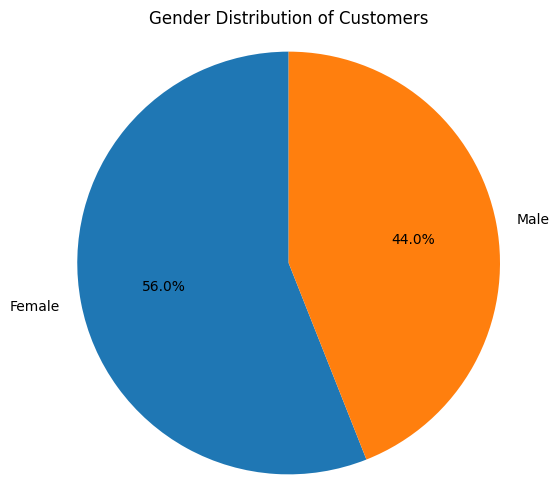

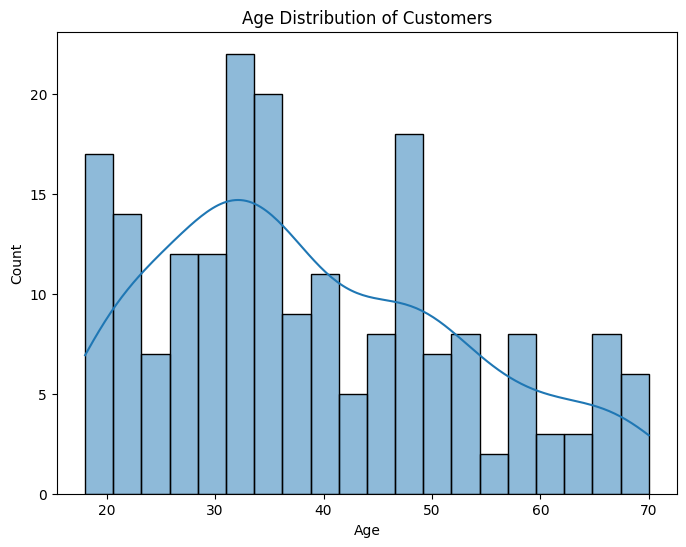

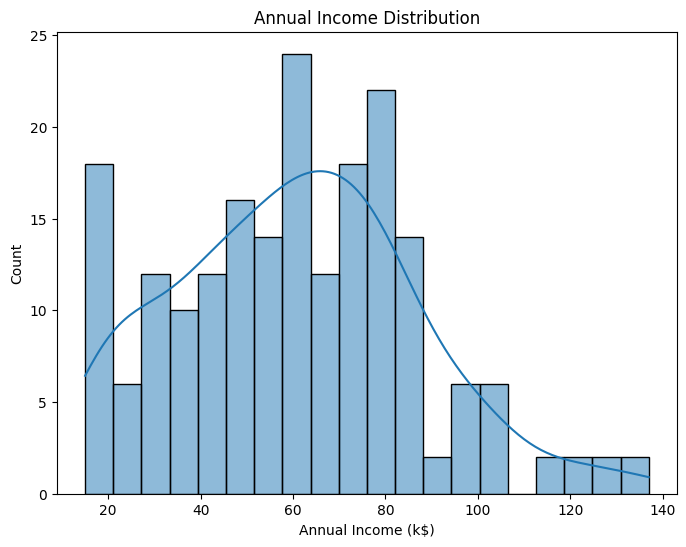

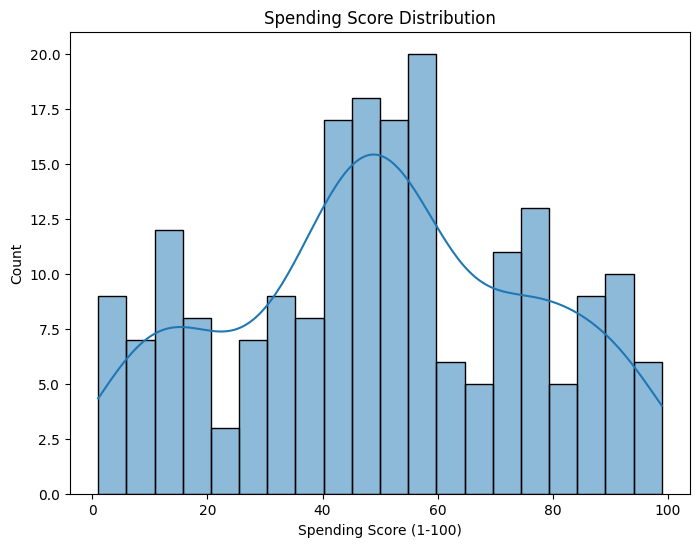

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns



# Scatter plot: Relationship between Age and Spending Score
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Age', y='Spending Score (1-100)', hue='Gender')
plt.title('Relationship between Age and Spending Score')
plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')
plt.show()



# Scatter plot: Relationship between Annual Income and Spending Score
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Annual Income (k$)', y='Spending Score (1-100)', hue='Gender')
plt.title('Relationship between Annual Income and Spending Score')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()



# Pie chart: Gender Distribution of Customers
gender_counts = df['Gender'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Gender Distribution of Customers')
plt.axis('equal')
plt.show()



# Histogram: Age Distribution of Customers
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='Age', bins=20, kde=True)
plt.title('Age Distribution of Customers')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()



# Histogram: Annual Income Distribution
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='Annual Income (k$)', bins=20, kde=True)
plt.title('Annual Income Distribution')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Count')
plt.show()



# Histogram: Spending Score Distribution
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='Spending Score (1-100)', bins=20, kde=True)
plt.title('Spending Score Distribution')
plt.xlabel('Spending Score (1-100)')
plt.ylabel('Count')
plt.show()

In [5]:
df=df.drop(['CustomerID'],axis=1)

In [6]:
df['Gender']=df.Gender.map({'Male':1,'Female':0})

In [7]:
df

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40
...,...,...,...,...
195,0,35,120,79
196,0,45,126,28
197,1,32,126,74
198,1,32,137,18


In [22]:
from sklearn.cluster import KMeans
#Instantiate the Model
km=KMeans(n_clusters=5)
clusters=km.fit_predict(df)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [23]:
clusters

array([2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4,
       2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4,
       2, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 0, 3, 1, 3, 0, 3, 0, 3,
       0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 1, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3,
       0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3,
       0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3,
       0, 3], dtype=int32)

In [24]:
df['labels']=clusters

In [18]:
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),labels
0,1,19,15,39,4
1,1,21,15,81,5
2,0,20,16,6,4
3,0,23,16,77,5
4,0,31,17,40,4


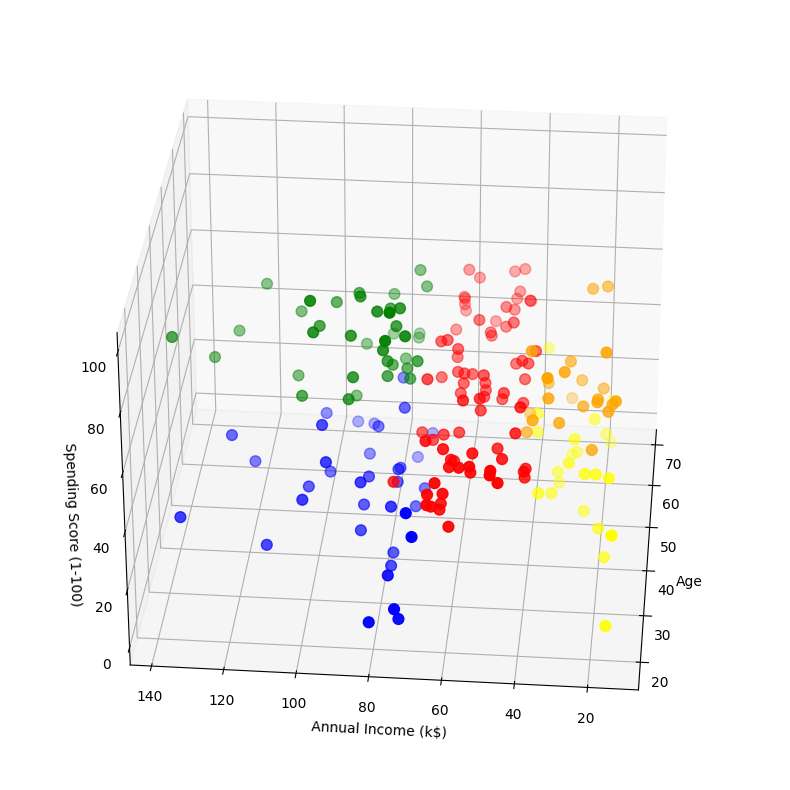

In [25]:
import matplotlib.pyplot as plt

from mpl_toolkits.mplot3d import Axes3D




fig = plt.figure(figsize=(20,10))

ax = fig.add_subplot(111, projection='3d')

ax.scatter(df.Age[df.labels == 0], df["Annual Income (k$)"][df.labels == 0], df["Spending Score (1-100)"][df.labels == 0], c='blue', s=60)

ax.scatter(df.Age[df.labels == 1], df["Annual Income (k$)"][df.labels == 1], df["Spending Score (1-100)"][df.labels == 1], c='red', s=60)
ax.scatter(df.Age[df.labels == 2], df["Annual Income (k$)"][df.labels == 2], df["Spending Score (1-100)"][df.labels == 2], c='yellow', s=60)
ax.scatter(df.Age[df.labels == 3], df["Annual Income (k$)"][df.labels == 3], df["Spending Score (1-100)"][df.labels == 3], c='green', s=60)
ax.scatter(df.Age[df.labels == 4], df["Annual Income (k$)"][df.labels == 4], df["Spending Score (1-100)"][df.labels == 4], c='orange', s=60)
#ax.scatter(df.Age[df.labels == 5], df["Annual Income (k$)"][df.labels == 5], df["Spending Score (1-100)"][df.labels == 5], c='black', s=60)




ax.view_init(30, 185)

plt.xlabel("Age")

plt.ylabel("Annual Income (k$)")

ax.set_zlabel('Spending Score (1-100)')

plt.show()

WCSS - within cluster sum of squares

lets plot WCSS vs K(num of clustors)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

[309378.06000000006, 213395.98465473152, 143689.0872255686, 104579.03248505882, 75448.21866724054, 58348.641363315044, 51165.18423710792, 44401.37325242323, 40907.788187488186, 37808.38227386649]


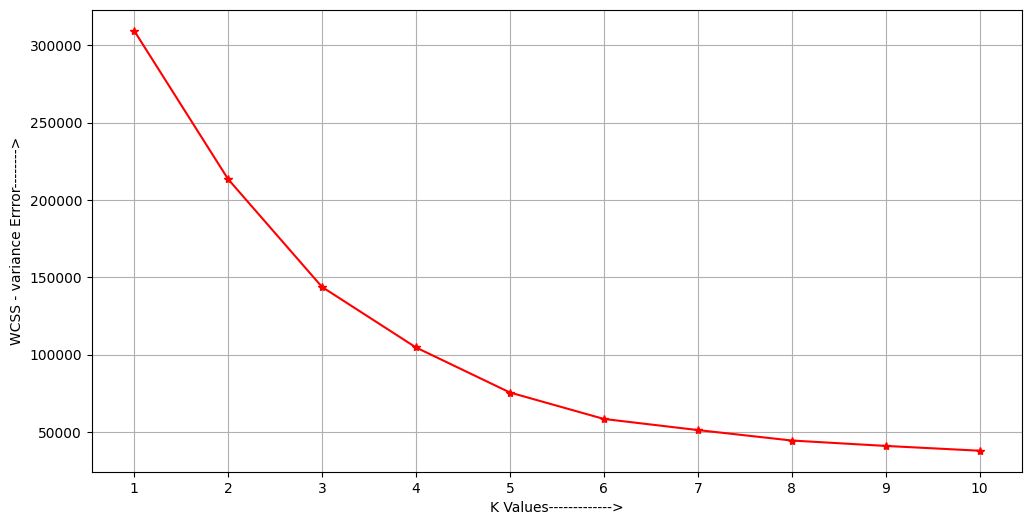

In [21]:
from sklearn.cluster import KMeans
import numpy as np
wcss=[]

for k in range (1,11):
  kmeans= KMeans (n_clusters=k)
  kmeans.fit(df)
  wcss.append(kmeans.inertia_)
  #computin WCSS for fitted model using inertia_ attribute of kmeans instance

print(wcss)

import matplotlib.pyplot as plt
plt.figure(figsize=((12,6)))
plt.grid()
plt.plot(range(1,11),wcss,color="red",marker="*")
plt.xlabel("K Values------------->")
plt.xticks(np.arange(1,11,1))
plt.ylabel("WCSS - variance Errror-------->")
plt.show()

